(9/26)  HW_1 部分

           日期        成交股數            成交金額    開盤價    最高價    最低價    收盤價    漲跌價差  \
0  2024-09-02  19,272,593  18,270,058,260  950.0  955.0  943.0  948.0   +4.00   
1  2024-09-03  23,205,623  21,908,471,541  948.0  952.0  939.0  940.0   -8.00   
2  2024-09-04  93,169,835  83,424,133,824  894.0  905.0  888.0  889.0  -51.00   
3  2024-09-05  34,147,890  30,998,595,394  907.0  915.0  900.0  902.0  +13.00   
4  2024-09-06  28,248,063  25,786,016,936  909.0  918.0  903.0  918.0  +16.00   
5  2024-09-09  38,448,946  34,456,838,126  892.0  900.0  891.0  899.0  -19.00   
6  2024-09-10  34,312,646  31,067,424,234  907.0  911.0  901.0  904.0   +5.00   
7  2024-09-11  19,513,256  17,621,000,956  906.0  906.0  900.0  901.0   -3.00   
8  2024-09-12  43,749,260  40,999,951,508  936.0  944.0  928.0  940.0   X0.00   
9  2024-09-13  28,307,441  26,795,862,243  955.0  955.0  939.0  947.0   +7.00   
10 2024-09-16  14,456,888  13,692,259,575  952.0  952.0  943.0  947.0    0.00   
11 2024-09-18  30,094,662  2

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


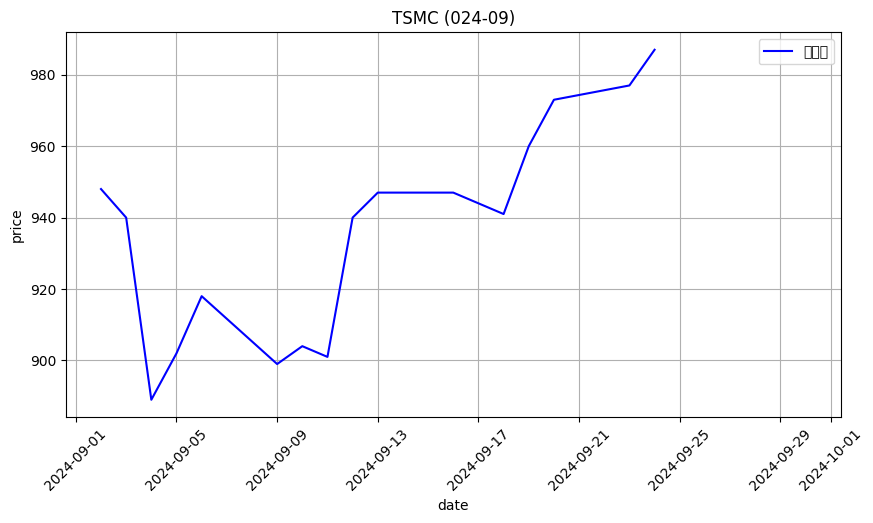

In [1]:
from pickle import encode_long
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 將民國日期轉換為西元日期
def convert_roc_to_ad(roc_date: str) -> str:
    # 假設日期格式為 "112/08/01" -> "2023/08/01"
    roc_year, month, day = roc_date.split('/')
    ad_year = str(int(roc_year) + 1911)  # 民國年 + 1911 = 西元年
    return f'{ad_year}/{month}/{day}'

# 從台灣證券交易所抓取資料
def get_twse_data(date: str, stock_no: str):
    url = f'https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_no}'
    response = requests.get(url)
    data = response.json()

    # 將抓取的資料轉換為 DataFrame
    df = pd.DataFrame(data['data'], columns=['日期', '成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數'])

    # 將民國日期轉換為西元日期，並轉換為 datetime 格式
    df['日期'] = pd.to_datetime(df['日期'].apply(convert_roc_to_ad))

    # 把數字型欄位轉換為浮點數
    df['開盤價'] = pd.to_numeric(df['開盤價'], errors='coerce')
    df['最高價'] = pd.to_numeric(df['最高價'], errors='coerce')
    df['最低價'] = pd.to_numeric(df['最低價'], errors='coerce')
    df['收盤價'] = pd.to_numeric(df['收盤價'], errors='coerce')

    return df

# 抓取股票的股價數據(日期,股票代號)
df_twse = get_twse_data('202409024', '2330')

# 顯示 DataFrame 資料
print(df_twse)

# 繪製收盤價折線圖
plt.figure(figsize=(10, 5))
plt.plot(df_twse['日期'], df_twse['收盤價'], label='收盤價', color='blue')
plt.title('TSMC (024-09)')
plt.xlabel('date')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [2]:
!pip install yfinance

                                  Open         High          Low        Close  \
Date                                                                            
2024-05-13 00:00:00+08:00   816.191580   818.175034   811.232943   812.224670   
2024-05-14 00:00:00+08:00   809.249442   818.174988   804.290806   818.174988   
2024-05-15 00:00:00+08:00   831.067477   837.017841   830.075750   832.059204   
2024-05-16 00:00:00+08:00   844.951602   848.918511   830.075694   834.042603   
2024-05-17 00:00:00+08:00   840.984740   840.984740   827.100558   828.092285   
...                                ...          ...          ...          ...   
2024-11-07 00:00:00+08:00  1050.000000  1075.000000  1050.000000  1065.000000   
2024-11-08 00:00:00+08:00  1085.000000  1090.000000  1080.000000  1090.000000   
2024-11-11 00:00:00+08:00  1080.000000  1090.000000  1070.000000  1085.000000   
2024-11-12 00:00:00+08:00  1060.000000  1065.000000  1050.000000  1050.000000   
2024-11-13 00:00:00+08:00  1

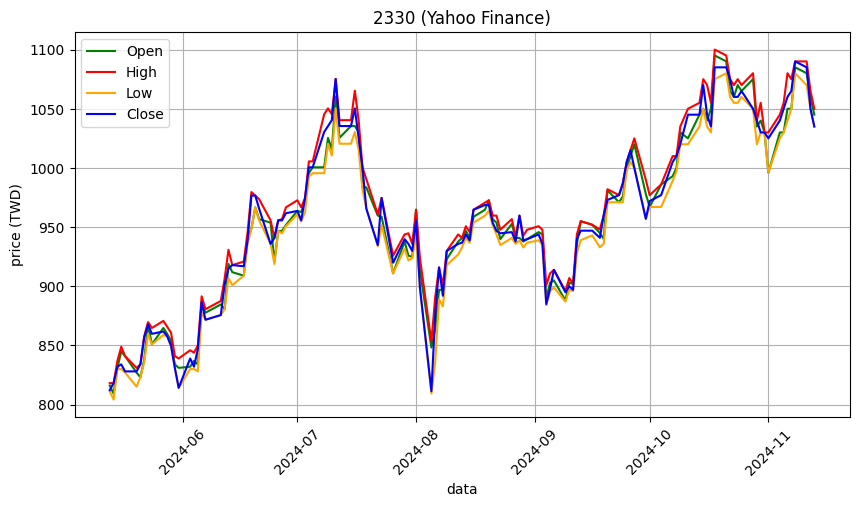

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# 從 Yahoo Finance 抓取資料
def get_yahoo_data(stock_symbol: str, period):
    stock = yf.Ticker(stock_symbol)
    df = stock.history(period=period)

    # 只取需要的欄位：開盤價、最高價、最低價、收盤價、成交量
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

    return df

# 抓取台積電 (2330.TW) 一個月的股價數據
df_yahoo = get_yahoo_data('2330.TW', '6mo')

# 顯示 DataFrame 資料
print(df_yahoo)

# 繪製開盤價、最高價、最低價與收盤價的折線圖
plt.figure(figsize=(10, 5))
plt.plot(df_yahoo.index, df_yahoo['Open'], label='Open', color='green')
plt.plot(df_yahoo.index, df_yahoo['High'], label='High', color='red')
plt.plot(df_yahoo.index, df_yahoo['Low'], label='Low', color='orange')
plt.plot(df_yahoo.index, df_yahoo['Close'], label='Close', color='blue')

plt.title('2330 (Yahoo Finance)')
plt.xlabel('data')
plt.ylabel('price (TWD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

(10/3) HW2

計算技術指標 (SMA, RSI, MACD)

In [4]:
import pandas as pd
import numpy as np

# 計算技術指標
def calculate_technical_indicators(df):
    # 計算SMA (10 天移動平均)
    df['SMA_10'] = df['Close'].rolling(window=10).mean()

    # 計算RSI
    delta = df['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # 計算MACD
    ema_12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema_12 - ema_26
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    return df

df_with_indicators = calculate_technical_indicators(df_yahoo)
print(df_with_indicators.tail())

                             Open    High     Low   Close    Volume  SMA_10  \
Date                                                                          
2024-11-07 00:00:00+08:00  1050.0  1075.0  1050.0  1065.0  43975446  1045.5   
2024-11-08 00:00:00+08:00  1085.0  1090.0  1080.0  1090.0  37099479  1048.0   
2024-11-11 00:00:00+08:00  1080.0  1090.0  1070.0  1085.0  34690205  1051.5   
2024-11-12 00:00:00+08:00  1060.0  1065.0  1050.0  1050.0  51099848  1052.5   
2024-11-13 00:00:00+08:00  1045.0  1050.0  1035.0  1035.0  43389524  1053.0   

                                 RSI       MACD  Signal_Line  
Date                                                          
2024-11-07 00:00:00+08:00  40.909091  14.315698    17.280328  
2024-11-08 00:00:00+08:00  51.851852  16.595024    17.143267  
2024-11-11 00:00:00+08:00  53.846154  17.792843    17.273182  
2024-11-12 00:00:00+08:00  46.666667  15.736516    16.965849  
2024-11-13 00:00:00+08:00  42.424242  12.749518    16.122583  


可視化 K 線圖


In [5]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.6 MB/s eta 0:00:00


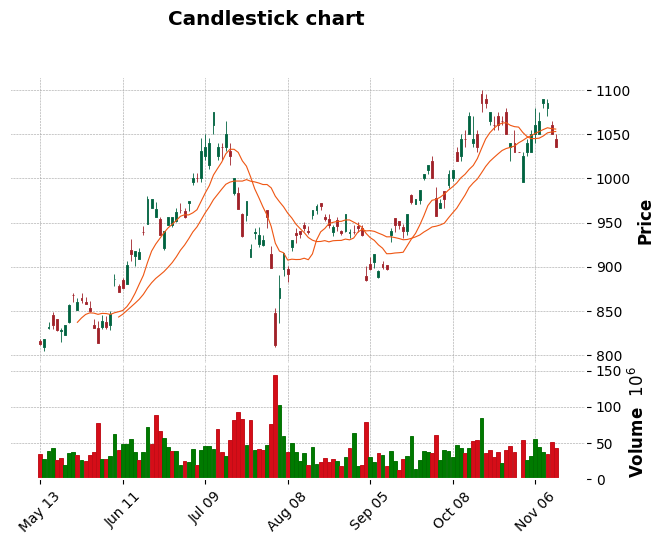

In [6]:
import mplfinance as mpf

# 可視化 K 線圖，結合 SMA
df_yahoo.index = pd.to_datetime(df_yahoo.index)  # 確保日期格式正確

# 增加技術指標(SMA)到圖表中
mpf.plot(df_yahoo, type='candle', style='charles',
         title='Candlestick chart',
         mav=(10, 20),  # 繪製10天和20天的SMA
         volume=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 創建漲跌標籤：如果下一天的收盤價高於當天，標記為1，否則為0
df_with_indicators['Target'] = np.where(df_with_indicators['Close'].shift(-1) > df_with_indicators['Close'], 1, 0)

# 刪除 NaN 值
df_with_indicators.dropna(inplace=True)

# 使用技術指標作為特徵
X = df_with_indicators[['SMA_10', 'RSI', 'MACD', 'Signal_Line']]
y = df_with_indicators['Target']

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 線性回歸模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_predictions = np.where(lr_predictions > 0.5, 1, 0)
print('線性回歸準確度:', accuracy_score(y_test, lr_predictions))

# 決策樹模型
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print('決策樹準確度:', accuracy_score(y_test, dt_predictions))

# 隨機森林模型
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print('隨機森林準確度:', accuracy_score(y_test, rf_predictions))

線性回歸準確度: 0.6521739130434783
決策樹準確度: 0.391304347826087
隨機森林準確度: 0.6956521739130435


(10/30) hw4

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 741ms/step - loss: 0.3597 - val_loss: 0.7719
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.3185 - val_loss: 0.6754
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.2476 - val_loss: 0.5899
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2187 - val_loss: 0.5047
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.1884 - val_loss: 0.4194
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.1445 - val_loss: 0.3250
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1088 - val_loss: 0.2201
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0732 - val_loss: 0.1158
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0359 - val_loss: 0.0333
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0208 - val_loss: 0.0079
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0279 - val_loss: 0.0086
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0300 - val_loss: 0.0094

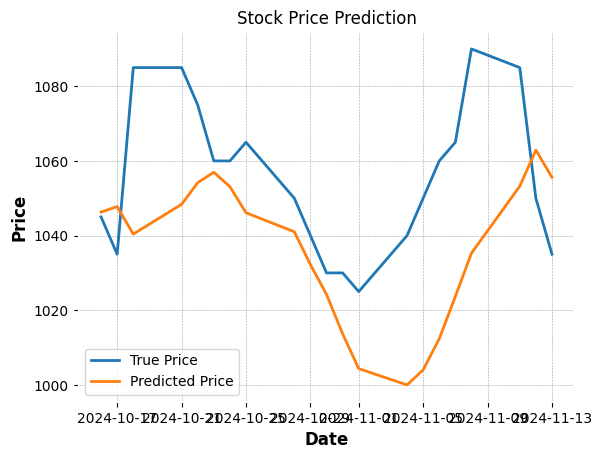

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 假設你已經有 DataFrame 'data'，包含股價的歷史數據
# 使用收盤價作為訓練數據
data = df_yahoo  # 替換為你的檔案
prices = data['Close'].values.reshape(-1, 1)

# 資料標準化
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)

# 準備訓練和測試數據
N = 10  # 預測N天後的股價
X, y = [], []
for i in range(len(scaled_prices) - N):
    X.append(scaled_prices[i:i+N])
    y.append(scaled_prices[i+N])

X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 建立神經網路模型
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(N, 1)),  # N 是時間步長
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# 預測並可視化
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)

plt.plot(data.index[-len(predicted):], scaler.inverse_transform(y_test.reshape(-1, 1)), label="True Price")
plt.plot(data.index[-len(predicted):], predicted_prices, label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# 生成特徵與標籤
data['5_MA'] = data['Close'].rolling(window=5).mean()
data['10_MA'] = data['Close'].rolling(window=10).mean()
data['Label'] = (data['5_MA'] > data['10_MA']).astype(int)  # 漲為1，跌為0

# 準備 CNN 的輸入數據
window_size = 20  # 每次觀察20天的K線
X, y = [], []
for i in range(len(data) - window_size):
    X.append(data[['Open', 'High', 'Low', 'Close']].values[i:i+window_size])
    y.append(data['Label'].values[i + window_size])

X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 建立 CNN 模型
model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(window_size, 4)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# 評估模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model accuracy: {accuracy}")

# 預測範例
predicted = (model.predict(X_test) > 0.5).astype(int)
print(f"實際結果: {y_test[:10]}")
print(f"預測結果: {predicted[:10].flatten()}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.4808 - loss: 25.8734 - val_accuracy: 0.3158 - val_loss: 3.6272
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4883 - loss: 13.3843 - val_accuracy: 0.5789 - val_loss: 28.6417
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5544 - loss: 21.7406 - val_accuracy: 0.4211 - val_loss: 13.2827
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4730 - loss: 14.6757 - val_accuracy: 0.4211 - val_loss: 7.7688
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3931 - loss: 8.0832 - val_accuracy: 0.5789 - val_loss: 12.1913
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5387 - loss: 9.6346 - val_accuracy: 0.4211 - val_loss: 6.4452
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4069 - loss: 4.6814 - val_accuracy: 0.5789 - val_loss: 3.4142
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5206 - loss: 2.6634 - val_accuracy: 0.4211 - val_loss: 1.9761
Epo

(11/13)hw5

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 0.3212 - val_loss: 0.6323
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2579 - val_loss: 0.5341
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2306 - val_loss: 0.4507
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1972 - val_loss: 0.3564
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1454 - val_loss: 0.2553
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1023 - val_loss: 0.1386
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0552 - val_loss: 0.0256
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0263 - val_loss: 0.0585
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0552 - val_loss: 0.0353
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0329 - val_loss: 0.0100
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0236 - val_loss: 0.0210
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0242 - val_loss: 0.0342
Epoch 13/50

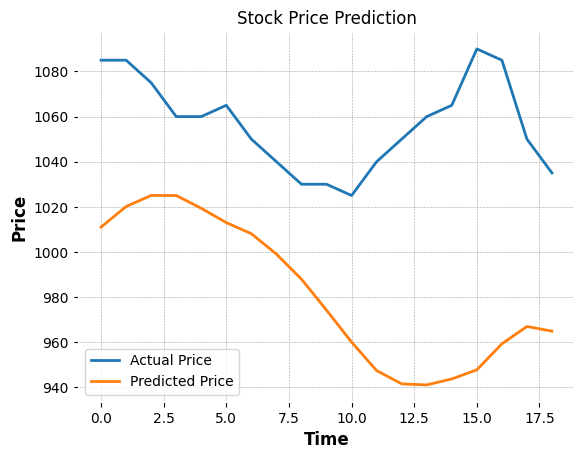

Mean Squared Error (MSE): 6706.600741982264


In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 假設你已經有 DataFrame 'data'，包含股價的歷史數據
data = df_yahoo # 替換為你的檔案
prices = data['Close'].values.reshape(-1, 1)

# 資料標準化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# 定義窗口大小，這裡設定為 20 天
window_size = 20

# 準備訓練數據
X, y = [], []
for i in range(len(scaled_prices) - window_size):
    X.append(scaled_prices[i:i+window_size])
    y.append(scaled_prices[i+window_size])

X, y = np.array(X), np.array(y)

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 建立 LSTM 模型
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(window_size, 1)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# 預測測試集並進行反標準化
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# 繪製預測與實際價格的比較圖
plt.plot(actual_prices, label="Actual Price")
plt.plot(predicted_prices, label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.show()

# 計算均方誤差 (MSE) 作為分析指標
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {(mse)}")

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - loss: 0.3445 - val_loss: 0.7760
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3475 - val_loss: 0.7708
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3302 - val_loss: 0.7656
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3260 - val_loss: 0.7604
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3278 - val_loss: 0.7552
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3232 - val_loss: 0.7500
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3229 - val_loss: 0.7449
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3243 - val_loss: 0.7398
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3192 - val_loss: 0.7347
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3095 - val_loss: 0.7297
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2892 - val_loss: 0.7247
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3058 - val_loss: 0.7197


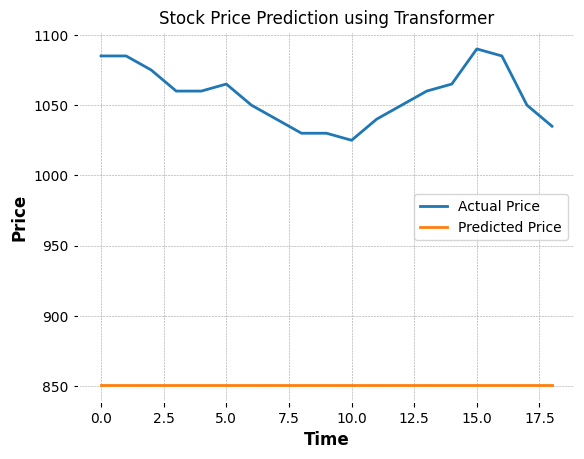

Mean Squared Error (MSE): 42815.93772749583


In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt

# 假設已經有 DataFrame 'data'，包含股價的歷史數據
data = df_yahoo  # 替換為你的檔案路徑
prices = data['Close'].values.reshape(-1, 1)

# 資料標準化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# 定義窗口大小，這裡設定為 20 天
window_size = 20

# 準備訓練數據
X, y = [], []
for i in range(len(scaled_prices) - window_size):
    X.append(scaled_prices[i:i+window_size])
    y.append(scaled_prices[i+window_size])

X, y = np.array(X), np.array(y)

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 轉換輸入形狀，以適配 Transformer 模型的需求
X_train = X_train.reshape(-1, window_size, 1)
X_test = X_test.reshape(-1, window_size, 1)

# 定義 Transformer 模型
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(ff_dim, activation="relu"),
            tf.keras.layers.Dense(embed_dim),
        ])
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training=None):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Transformer 模型結構
def build_transformer_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    transformer_block = TransformerBlock(embed_dim=32, num_heads=2, ff_dim=32)
    x = transformer_block(inputs, training=True)  # 傳入 training=True
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(20, activation="relu")(x)
    outputs = tf.keras.layers.Dense(1)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

model = build_transformer_model((window_size, 1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# 預測測試集並進行反標準化
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# 繪製預測與實際價格的比較圖
plt.plot(actual_prices, label="Actual Price")
plt.plot(predicted_prices, label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Stock Price Prediction using Transformer")
plt.legend()
plt.show()

# 計算均方誤差 (MSE) 作為分析指標
mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")
